## Decision Tree for Classification

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [15]:
# Tải data iris
iris = datasets.load_iris()
iris_X, iris_y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Kích thước dữ liệu: {iris_X.shape}")
print(f"Số lượng đặc trưng: {len(feature_names)}")
print(f"Tên các đặc trưng: {feature_names}")
print(f"Số lượng lớp: {len(target_names)}")
print(f"Tên các lớp: {target_names}")

Kích thước dữ liệu: (150, 4)
Số lượng đặc trưng: 4
Tên các đặc trưng: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Số lượng lớp: 3
Tên các lớp: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Tạo dataframe
iris_df = pd.DataFrame(iris_X, columns=feature_names)
iris_df["target"] = iris_y
iris_df["species"] = [target_names[i] for i in iris_y]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


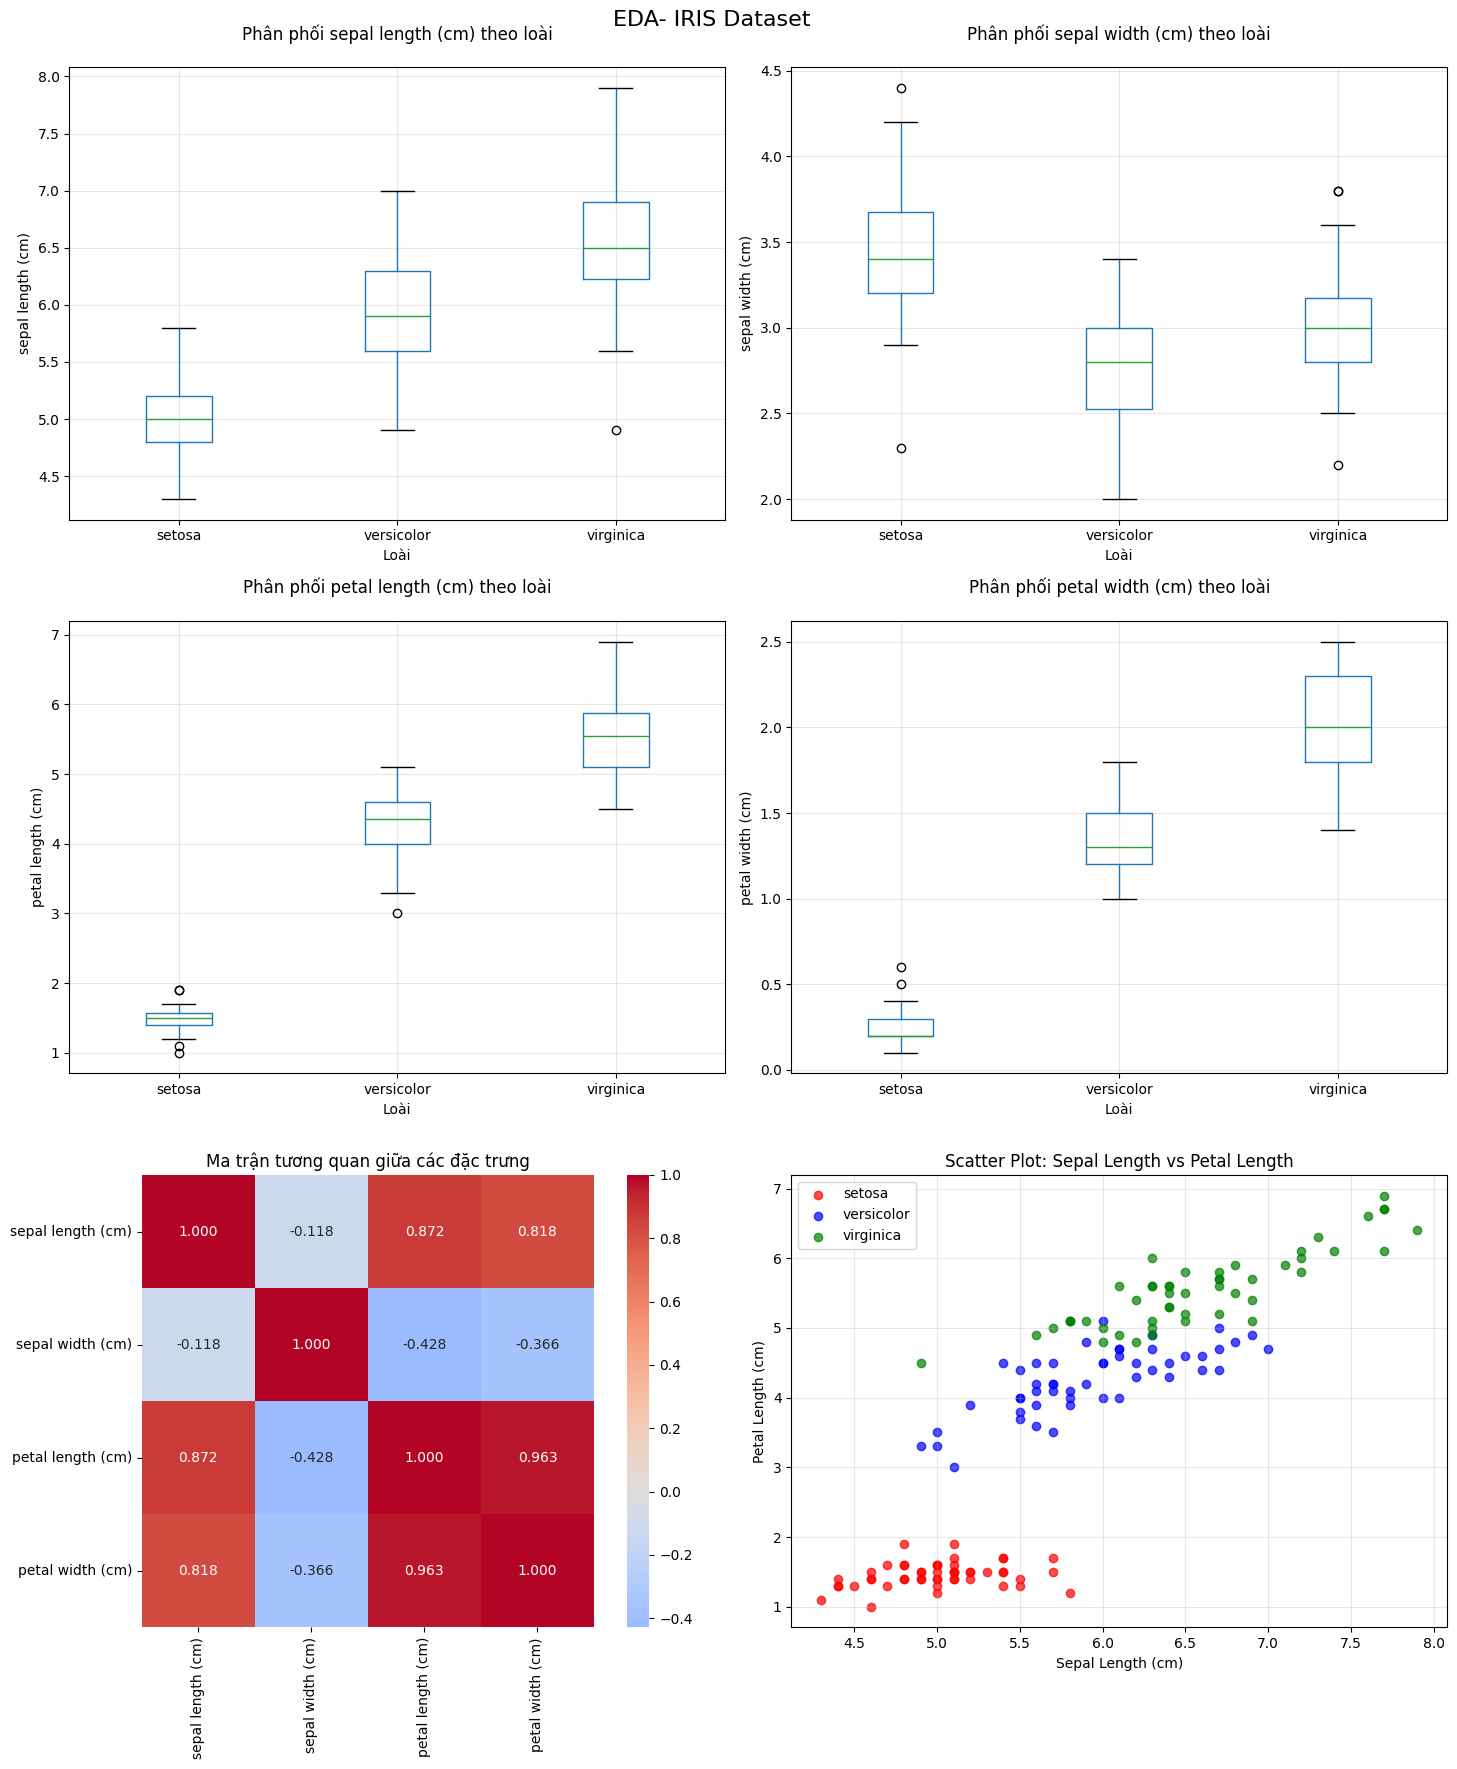

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Phân phối các đặc trưng theo loài
for i, feature in enumerate(feature_names):
    ax = axes[i//2, i%2]
    iris_df.boxplot(column=feature, by="species", ax=ax)
    ax.set_title(f"Phân phối {feature} theo loài", fontsize=12, pad=20)
    ax.set_xlabel("Loài", fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(True, alpha=0.3)

# 2. Ma trận tương quan
axes[2, 0].remove()
axes[2, 0] = plt.subplot(3, 2, 5)
correlation_matrix = iris_df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, ax=axes[2, 0], fmt=".3f")
axes[2, 0].set_title("Ma trận tương quan giữa các đặc trưng", fontsize=12)

# 3. Scatter plot
axes[2, 1].remove()
axes[2, 1] = plt.subplot(3, 2, 6)
colors = ["red", "blue", "green"]
for i, species in enumerate(target_names):
    species_data = iris_df[iris_df["species"] == species]
    axes[2, 1].scatter(species_data["sepal length (cm)"], species_data["petal length (cm)"], label=species, alpha=0.7, color=colors[i])
axes[2, 1].set_xlabel("Sepal Length (cm)", fontsize=10)
axes[2, 1].set_ylabel("Petal Length (cm)", fontsize=10)
axes[2, 1].set_title("Scatter Plot: Sepal Length vs Petal Length", fontsize=12)
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
plt.suptitle("EDA- IRIS Dataset", fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig("01_EDA_IRIS.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
# Chia tập train - test
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [ ]:
# Scale dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree Classifier

In [8]:
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1, criterion='entropy')
dt_classifier.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Evaluate

In [9]:
y_pred = dt_classifier.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



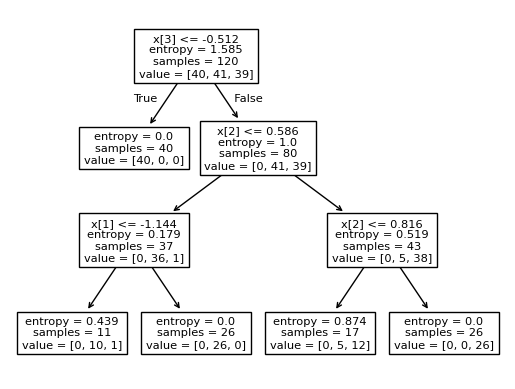

In [14]:
from sklearn import tree

tree.plot_tree(dt_classifier)
plt.show()